# Comparison of HD_DIT_HAP vs HD_DIT_HAP_generationPLUS1

This notebook compares the curve fitting parameters between the two datasets:
- HD_DIT_HAP (original)
- HD_DIT_HAP_generationPLUS1 (with additional generation)

Comparison columns: A, um, lam, R2, RMSE

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/config/DIT_HAP.mplstyle')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
# Define file paths
file1 = '/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/18_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv'
file2 = '/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP_generationPLUS1/17_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv'

# Load the datasets
print("Loading datasets...")
df1 = pd.read_csv(file1, sep='\t')
df2 = pd.read_csv(file2, sep='\t')

print(f"Dataset 1 (HD_DIT_HAP): {df1.shape[0]} rows, {df1.shape[1]} columns")
print(f"Dataset 2 (HD_DIT_HAP_generationPLUS1): {df2.shape[0]} rows, {df2.shape[1]} columns")

# Display column names
print("\nColumns in Dataset 1:")
print(df1.columns.tolist())
print("\nColumns in Dataset 2:")
print(df2.columns.tolist())

Loading datasets...
Dataset 1 (HD_DIT_HAP): 4519 rows, 27 columns
Dataset 2 (HD_DIT_HAP_generationPLUS1): 4518 rows, 27 columns

Columns in Dataset 1:
['Systematic ID', 'Name', 'FYPOviability', 'DeletionLibrary_essentiality', 'time_points', 'Status', 'A', 'um', 'lam', 'R2', 'RMSE', 'normalized_RMSE', 't0', 't1', 't2', 't3', 't4', 't0_fitted', 't1_fitted', 't2_fitted', 't3_fitted', 't4_fitted', 't0_residual', 't1_residual', 't2_residual', 't3_residual', 't4_residual']

Columns in Dataset 2:
['Systematic ID', 'Name', 'FYPOviability', 'DeletionLibrary_essentiality', 'time_points', 'Status', 'A', 'um', 'lam', 'R2', 'RMSE', 'normalized_RMSE', 'YES0', 'YES1', 'YES2', 'YES3', 'YES4', 'YES0_fitted', 'YES1_fitted', 'YES2_fitted', 'YES3_fitted', 'YES4_fitted', 'YES0_residual', 'YES1_residual', 'YES2_residual', 'YES3_residual', 'YES4_residual']


In [4]:
# Extract comparison columns
comparison_cols = ["A", "um", "lam", "R2", "RMSE"]

# Create comparison dataframe
print("Extracting comparison columns...")

# Check if all comparison columns exist in both datasets
cols1 = [col for col in comparison_cols if col in df1.columns]
cols2 = [col for col in comparison_cols if col in df2.columns]

print(f"Available columns in Dataset 1: {cols1}")
print(f"Available columns in Dataset 2: {cols2}")

# Extract the comparison data
comp_data1 = df1[cols1].copy()
comp_data2 = df2[cols2].copy()

# Add gene identifiers
comp_data1["Systematic ID"] = df1["Systematic ID"]
comp_data1["Name"] = df1["Name"]
comp_data2["Systematic ID"] = df2["Systematic ID"]
comp_data2["Name"] = df2["Name"]

print(f"\nComparison data extracted:")
print(f"Dataset 1: {comp_data1.shape[0]} genes")
print(f"Dataset 2: {comp_data2.shape[0]} genes")

Extracting comparison columns...
Available columns in Dataset 1: ['A', 'um', 'lam', 'R2', 'RMSE']
Available columns in Dataset 2: ['A', 'um', 'lam', 'R2', 'RMSE']

Comparison data extracted:
Dataset 1: 4519 genes
Dataset 2: 4518 genes


In [5]:
# Find common genes between the two datasets
common_genes = set(comp_data1["Systematic ID"]) & set(comp_data2["Systematic ID"])
print(f"Number of common genes: {len(common_genes)}")

# Filter to common genes for comparison
comp_data1_common = comp_data1[comp_data1["Systematic ID"].isin(common_genes)].sort_values("Systematic ID")
comp_data2_common = comp_data2[comp_data2["Systematic ID"].isin(common_genes)].sort_values("Systematic ID")

print(f"Common genes in Dataset 1: {comp_data1_common.shape[0]}")
print(f"Common genes in Dataset 2: {comp_data2_common.shape[0]}")

# Display basic statistics
print("\nBasic statistics for Dataset 1 (HD_DIT_HAP):")
print(comp_data1_common[comparison_cols].describe())

print("\nBasic statistics for Dataset 2 (HD_DIT_HAP_generationPLUS1):")
print(comp_data2_common[comparison_cols].describe())

Number of common genes: 4518
Common genes in Dataset 1: 4518
Common genes in Dataset 2: 4518

Basic statistics for Dataset 1 (HD_DIT_HAP):
                 A           um          lam           R2         RMSE
count  4518.000000  4518.000000  4518.000000  4518.000000  4518.000000
mean      2.262219     0.304382     0.960563     0.348850     0.162526
std       2.864837     0.398905     1.867281     0.811234     0.193026
min      -1.000000    -0.168000    -0.000000    -4.054000     0.002000
25%       0.006000     0.002000     0.000000    -0.076250     0.066000
50%       0.567500     0.071000     0.000000     0.749000     0.105000
75%       5.684250     0.639000     1.017750     0.984000     0.190000
max      12.480000     2.091000     9.511000     1.000000     2.950000

Basic statistics for Dataset 2 (HD_DIT_HAP_generationPLUS1):
                 A           um          lam           R2         RMSE
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000
mean      2.278972

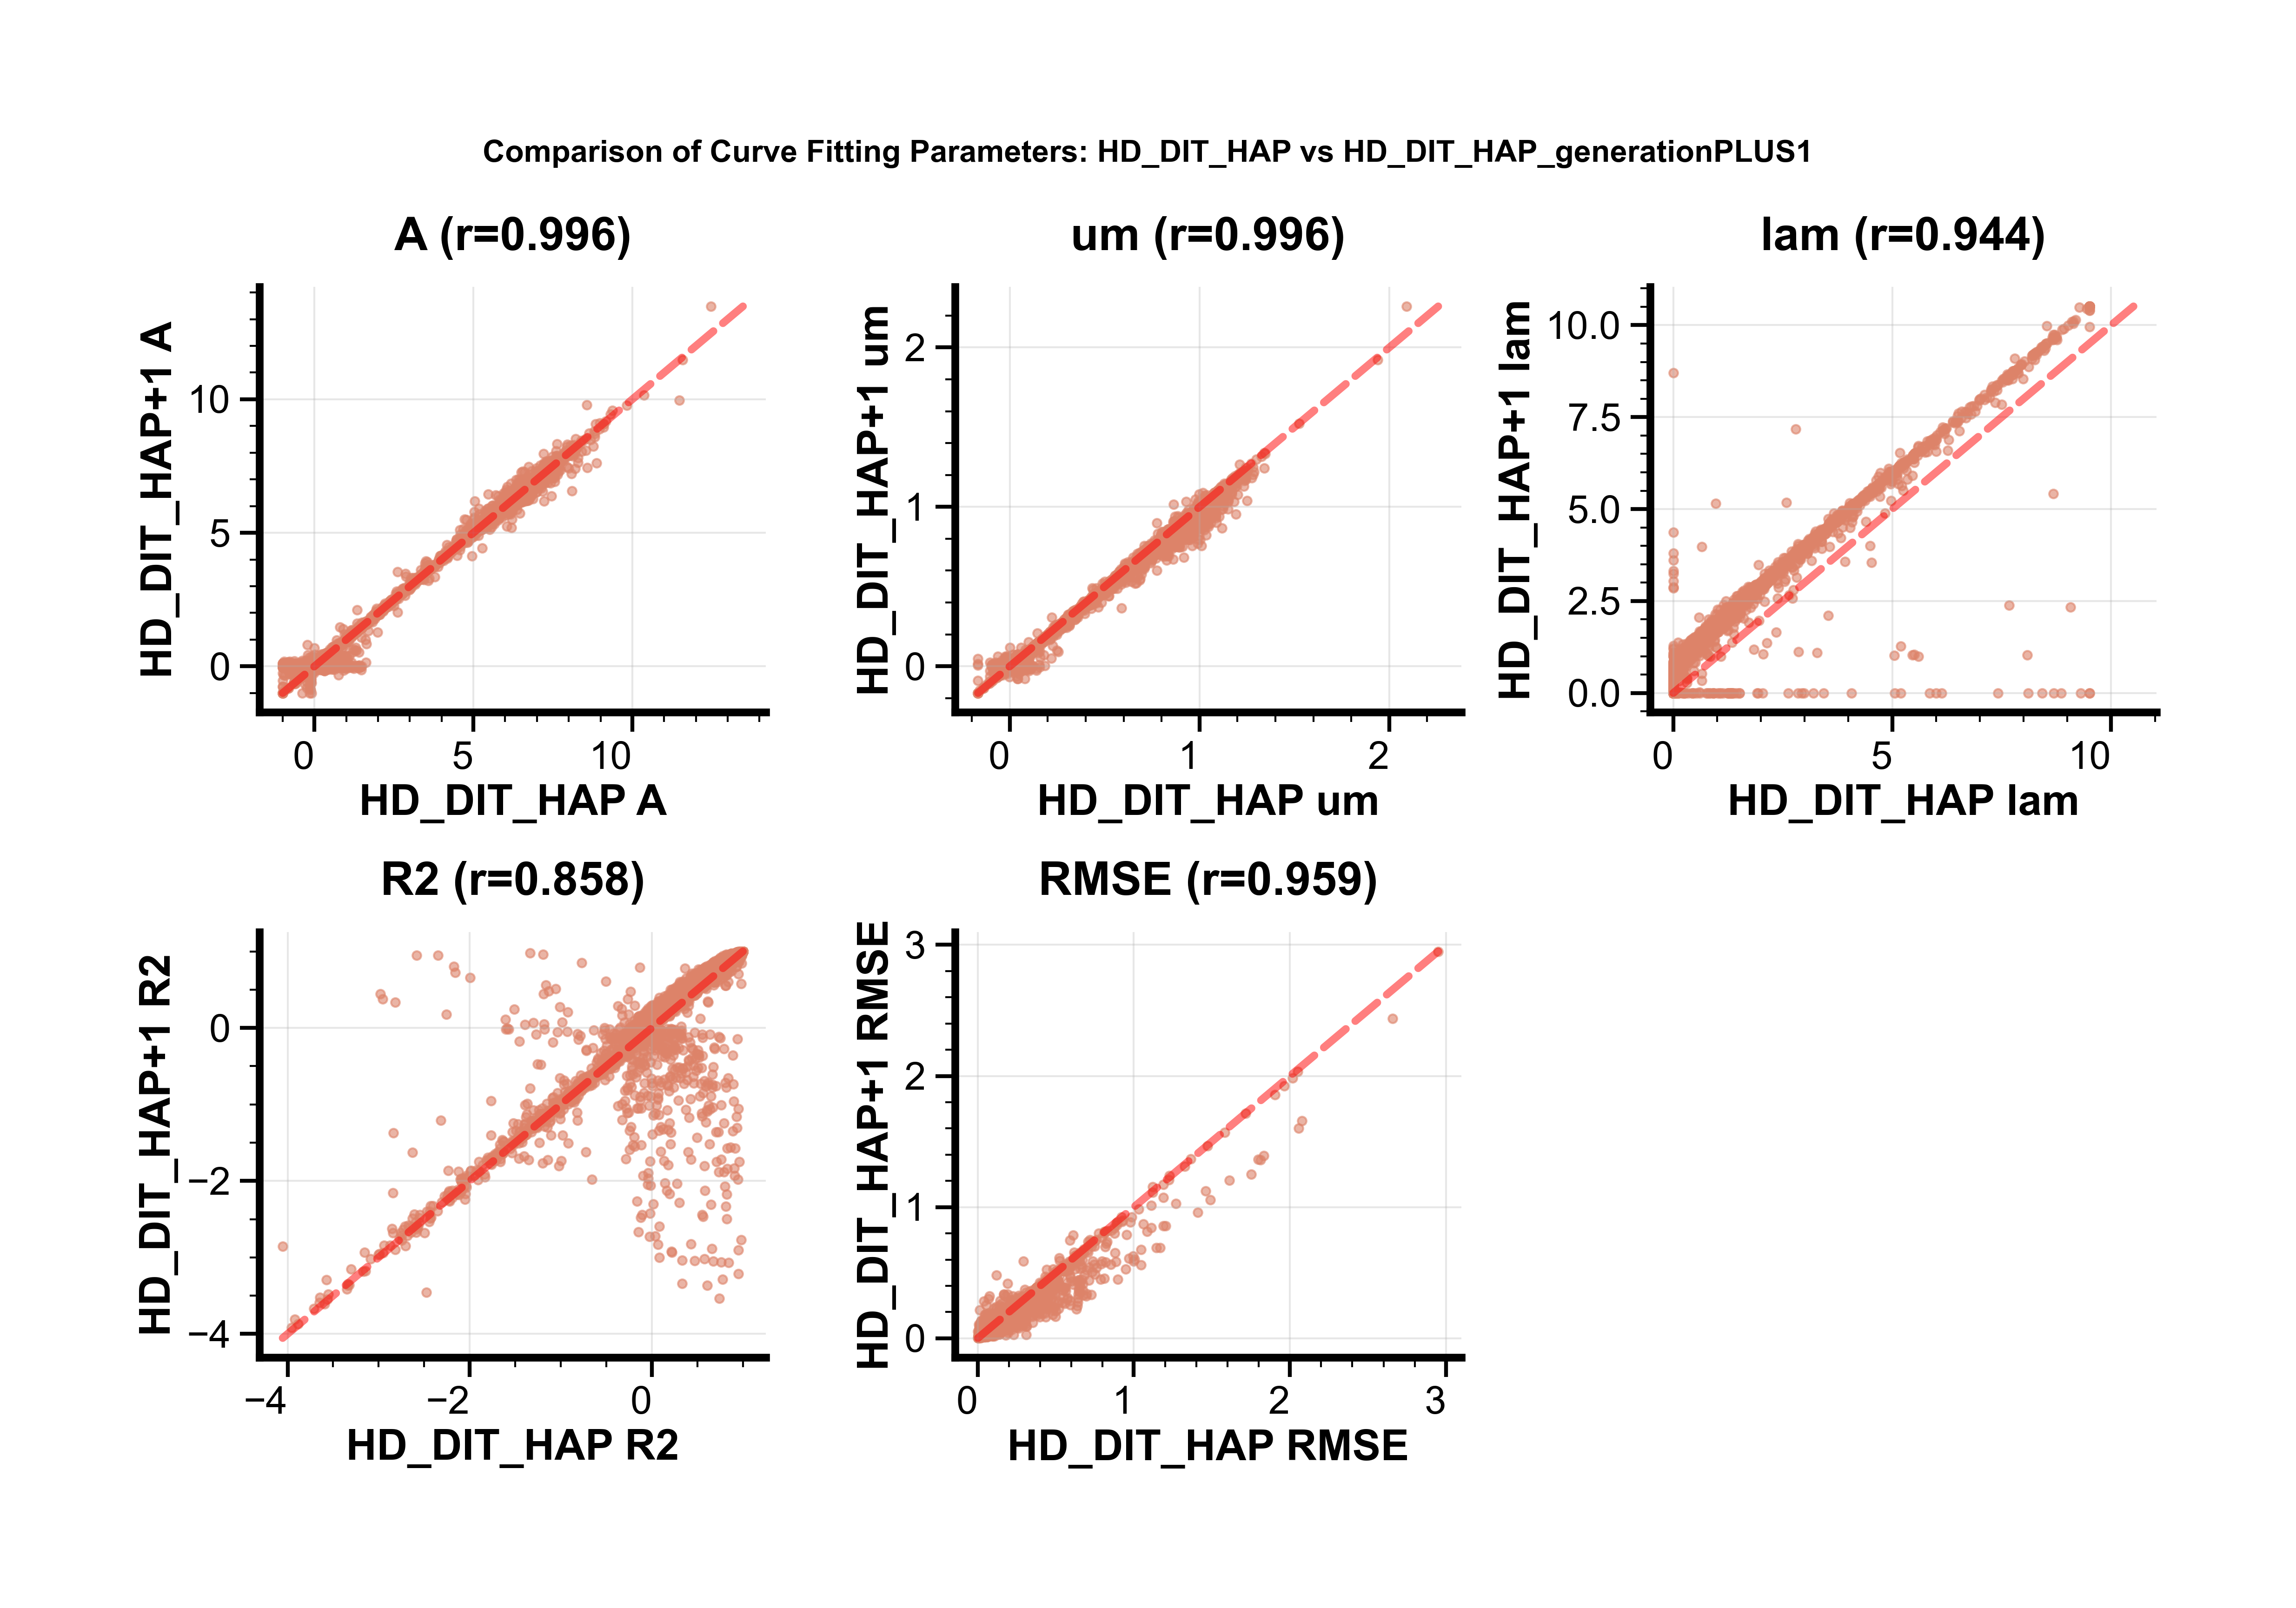

In [ ]:
# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Comparison of Curve Fitting Parameters: HD_DIT_HAP vs HD_DIT_HAP_generationPLUS1", fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each parameter
for i, col in enumerate(comparison_cols):
    if i < len(axes):
        ax = axes[i]
        
        # Get data
        x = comp_data1_common[col].values
        y = comp_data2_common[col].values
        
        # Remove any NaN values
        mask = ~(np.isnan(x) | np.isnan(y))
        x_clean = x[mask]
        y_clean = y[mask]
        
        # Create scatter plot
        ax.scatter(x_clean, y_clean, alpha=0.6, s=20)
        
        # Add diagonal line
        min_val = min(np.min(x_clean), np.min(y_clean))
        max_val = max(np.max(x_clean), np.max(y_clean))
        ax.plot([min_val, max_val], [min_val, max_val], "r--", alpha=0.5)
        
        # Calculate correlation
        corr = np.corrcoef(x_clean, y_clean)[0, 1]
        
        # Set labels and title
        ax.set_xlabel(f"HD_DIT_HAP {col}")
        ax.set_ylabel(f"HD_DIT_HAP+1 {col}")
        ax.set_title(f"{col} (r={corr:.3f})")
        ax.grid(True, alpha=0.3)

# Remove empty subplot
if len(comparison_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
plt.close()

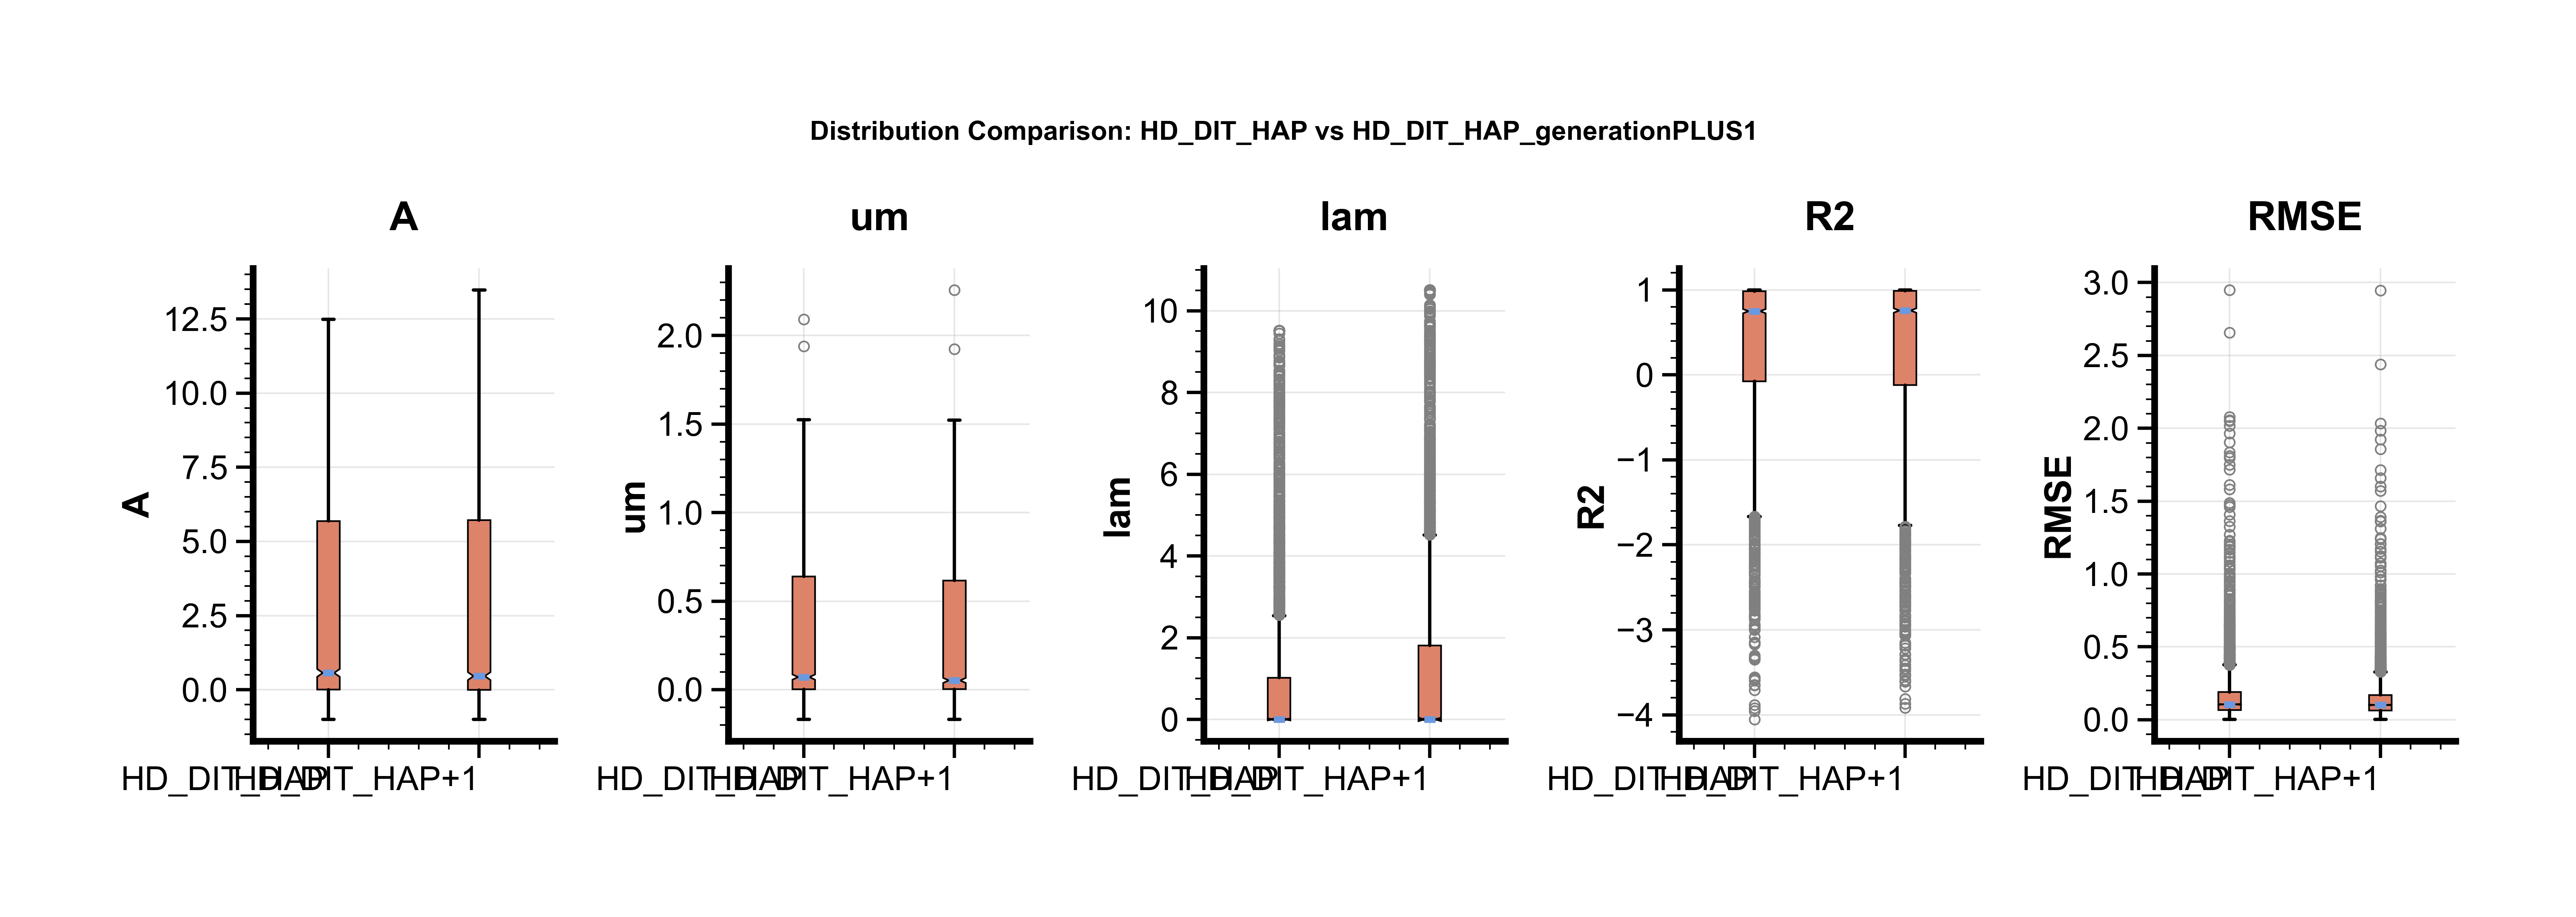

In [7]:
# Create box plots for comparison
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle("Distribution Comparison: HD_DIT_HAP vs HD_DIT_HAP_generationPLUS1", fontsize=16)

for i, col in enumerate(comparison_cols):
    ax = axes[i]
    
    # Prepare data for box plot
    data = [
        comp_data1_common[col].dropna().values,
        comp_data2_common[col].dropna().values
    ]
    
    # Create box plot
    ax.boxplot(data, labels=["HD_DIT_HAP", "HD_DIT_HAP+1"])
    ax.set_title(f"{col}")
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

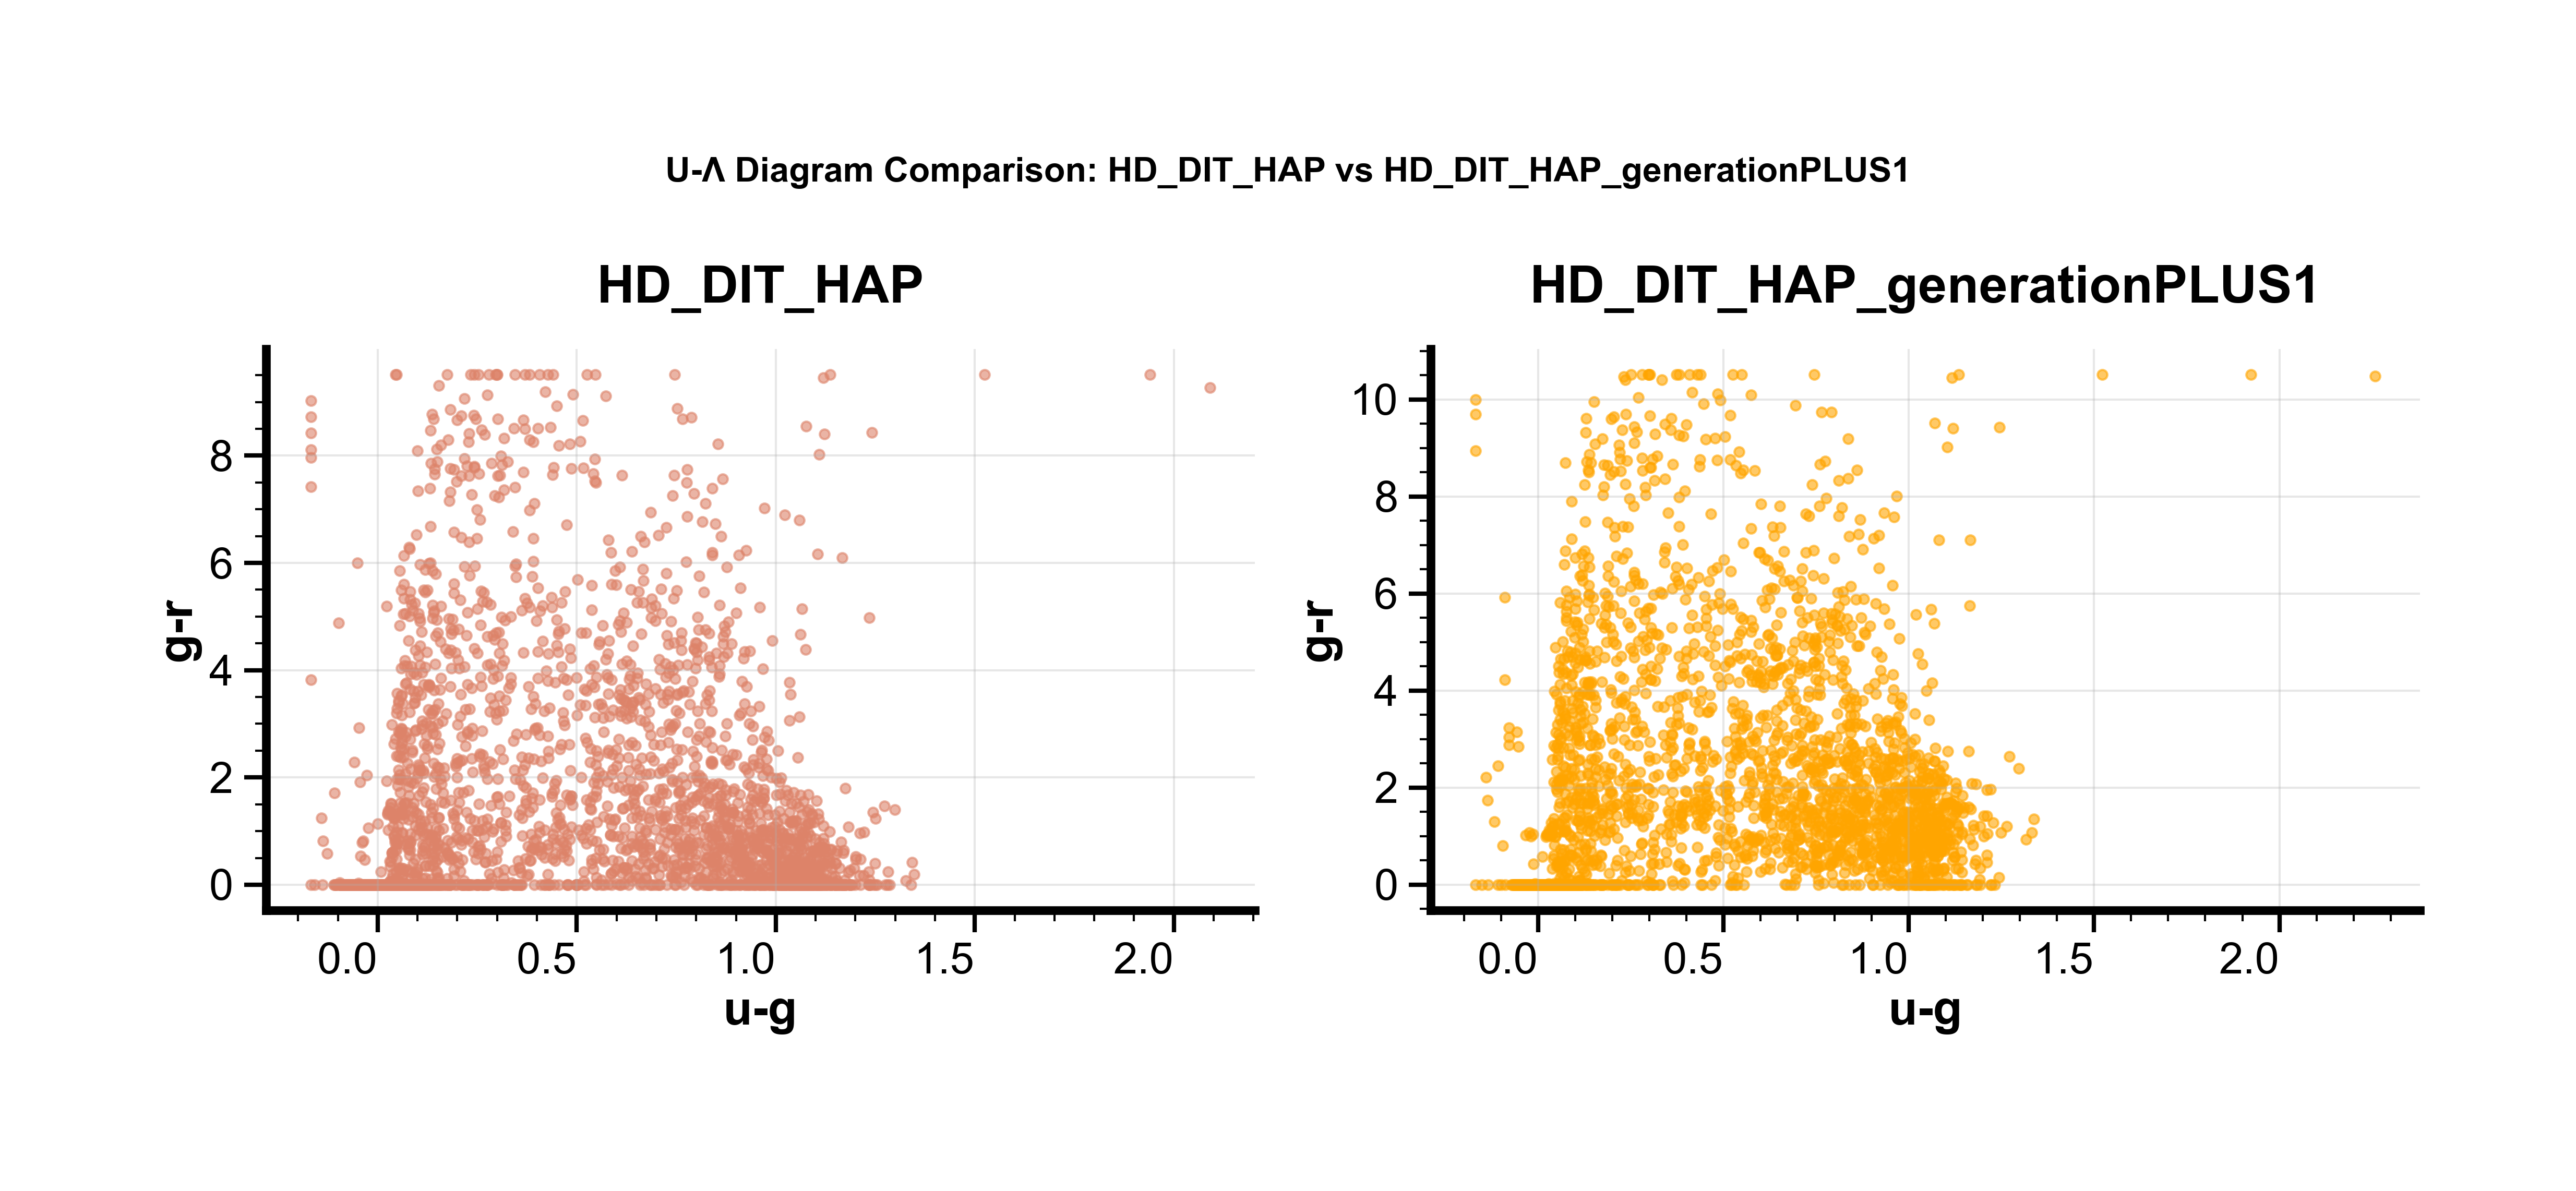

In [11]:
# Create U-Λ diagram plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("U-Λ Diagram Comparison: HD_DIT_HAP vs HD_DIT_HAP_generationPLUS1", fontsize=16)

# Define U and Lambda columns
u_col = 'um'
lambda_col = 'lam'

# Check if the required columns exist
if u_col in comparison_cols and lambda_col in comparison_cols:
    
    # Plot for HD_DIT_HAP
    ax1 = axes[0]
    x1 = comp_data1_common[u_col].dropna()
    y1 = comp_data1_common[lambda_col].dropna()
    
    ax1.scatter(x1, y1, alpha=0.6, s=20)
    ax1.set_xlabel('u-g')
    ax1.set_ylabel('g-r')
    ax1.set_title('HD_DIT_HAP')
    ax1.grid(True, alpha=0.3)
    # ax1.invert_yaxis()  # Invert y-axis for standard U-Λ diagram
    
    # Plot for HD_DIT_HAP_generationPLUS1
    ax2 = axes[1]
    x2 = comp_data2_common[u_col].dropna()
    y2 = comp_data2_common[lambda_col].dropna()
    
    ax2.scatter(x2, y2, alpha=0.6, s=20, color='orange')
    ax2.set_xlabel('u-g')
    ax2.set_ylabel('g-r')
    ax2.set_title('HD_DIT_HAP_generationPLUS1')
    ax2.grid(True, alpha=0.3)
    # ax2.invert_yaxis()  # Invert y-axis for standard U-Λ diagram
    
    plt.tight_layout()
    plt.show()
    plt.close()
    
else:
    print(f"Warning: Required columns for U-Λ diagram not found.")
    print(f"Available columns: {comparison_cols}")
